### Imports

In [1]:
import pandas as pd
from fastai.vision.all import *

In [12]:
import pathlib
import os

In [31]:
path = pathlib.Path().absolute()
path = os.path.join(path, "Assets", "Data")
path

'/home/carrotpie/code/classB/SegmentationLearner/Assets/Data'

In [11]:
?get_image_files

Signature: get_image_files(path, recurse=True, folders=None)
Docstring: Get image files in `path` recursively, only in `folders`, if specified.
File:      ~/code/classB/classB_env/lib/python3.6/site-packages/fastai/data/transforms.py
Type:      function


In [25]:
#path = untar_data(URLs.CAMVID_TINY)
#path.ls()

(#3) [Path('/home/carrotpie/.fastai/data/camvid_tiny/codes.txt'),Path('/home/carrotpie/.fastai/data/camvid_tiny/labels'),Path('/home/carrotpie/.fastai/data/camvid_tiny/images')]

In [30]:
?SegmentationDataLoaders.from_label_func

Signature:
SegmentationDataLoaders.from_label_func(
    path,
    fnames,
    label_func,
    valid_pct=0.2,
    seed=None,
    codes=None,
    item_tfms=None,
    batch_tfms=None,
    bs=64,
    val_bs=None,
    shuffle=True,
    device=None,
)
Docstring: Create from list of `fnames` in `path`s with `label_func`.
File:      ~/code/classB/classB_env/lib/python3.6/site-packages/fastai/vision/data.py
Type:      method


In [26]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
#codes = np.loadtxt(path/'labels.csv', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [42]:
fnames = get_image_files(os.path.join(path,"screenshots"))
#fnames = get_image_files(path/"images")
fnames[0]

Path('/home/carrotpie/code/classB/SegmentationLearner/Assets/Data/screenshots/75.png')

In [43]:
def label_func(fn): return os.path.join(path,"labels",f"{fn.stem}{fn.suffix}")

In [44]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = fnames, label_func = label_func
)

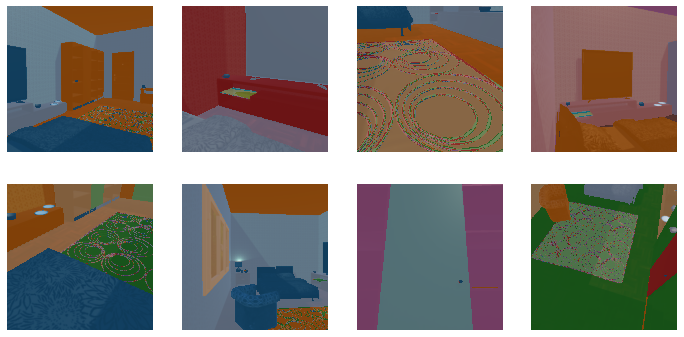

In [45]:
dls.show_batch(max_n=20)

In [46]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

AssertionError: `n_out` is not defined, and could not be inferred from data, set `dls.c` or pass `n_out`